In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv("QVI_purchase_behaviour.csv")
df1=pd.read_csv("QVI_transaction_data.csv")


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [13]:
df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [14]:
df1.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [15]:
df1['DATE'] = pd.to_datetime(df1['DATE'])

In [16]:

data = df1.merge(df, on='LYLTY_CARD_NBR', how='left')

In [17]:
# Total Spend by Customer Segment
customer_spend = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
print(customer_spend)


                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
0   MIDAGE SINGLES/COUPLES           Budget   35514.80
1   MIDAGE SINGLES/COUPLES       Mainstream   90803.85
2   MIDAGE SINGLES/COUPLES          Premium   58432.65
3             NEW FAMILIES           Budget   21928.45
4             NEW FAMILIES       Mainstream   17013.90
5             NEW FAMILIES          Premium   11491.10
6           OLDER FAMILIES           Budget  168363.25
7           OLDER FAMILIES       Mainstream  103445.55
8           OLDER FAMILIES          Premium   81958.40
9    OLDER SINGLES/COUPLES           Budget  136769.80
10   OLDER SINGLES/COUPLES       Mainstream  133393.80
11   OLDER SINGLES/COUPLES          Premium  132263.15
12                RETIREES           Budget  113147.80
13                RETIREES       Mainstream  155677.05
14                RETIREES          Premium   97646.05
15          YOUNG FAMILIES           Budget  139345.85
16          YOUNG FAMILIES       Mainstream   92788.75
17        

In [18]:
#Average Spend per Transaction by Customer Segment
average_customer_spend=data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].mean().reset_index()
print(average_customer_spend)

                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
0   MIDAGE SINGLES/COUPLES           Budget   7.074661
1   MIDAGE SINGLES/COUPLES       Mainstream   7.647284
2   MIDAGE SINGLES/COUPLES          Premium   7.112056
3             NEW FAMILIES           Budget   7.297321
4             NEW FAMILIES       Mainstream   7.317806
5             NEW FAMILIES          Premium   7.231655
6           OLDER FAMILIES           Budget   7.269570
7           OLDER FAMILIES       Mainstream   7.262395
8           OLDER FAMILIES          Premium   7.322945
9    OLDER SINGLES/COUPLES           Budget   7.430315
10   OLDER SINGLES/COUPLES       Mainstream   7.282116
11   OLDER SINGLES/COUPLES          Premium   7.449766
12                RETIREES           Budget   7.443445
13                RETIREES       Mainstream   7.252262
14                RETIREES          Premium   7.456174
15          YOUNG FAMILIES           Budget   7.287201
16          YOUNG FAMILIES       Mainstream   7.189025
17        

In [19]:
# Customer Count per Segment
customer_count = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
print(customer_count)


                 LIFESTAGE PREMIUM_CUSTOMER  LYLTY_CARD_NBR
0   MIDAGE SINGLES/COUPLES           Budget            1504
1   MIDAGE SINGLES/COUPLES       Mainstream            3340
2   MIDAGE SINGLES/COUPLES          Premium            2431
3             NEW FAMILIES           Budget            1112
4             NEW FAMILIES       Mainstream             849
5             NEW FAMILIES          Premium             588
6           OLDER FAMILIES           Budget            4675
7           OLDER FAMILIES       Mainstream            2831
8           OLDER FAMILIES          Premium            2274
9    OLDER SINGLES/COUPLES           Budget            4929
10   OLDER SINGLES/COUPLES       Mainstream            4930
11   OLDER SINGLES/COUPLES          Premium            4750
12                RETIREES           Budget            4454
13                RETIREES       Mainstream            6479
14                RETIREES          Premium            3872
15          YOUNG FAMILIES           Bud

In [30]:
plt.figure=(figsize(12,6))
sns.barplot(data=customer_spend, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.title("Total Sales by Customer Segments")
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=12,6)
sns.barplot(data=customer_spend,x='LIFESTAGE',y='Tot_Sales',hue='PREMIUM_CUSTOMER')


SyntaxError: positional argument follows keyword argument (1700860085.py, line 6)

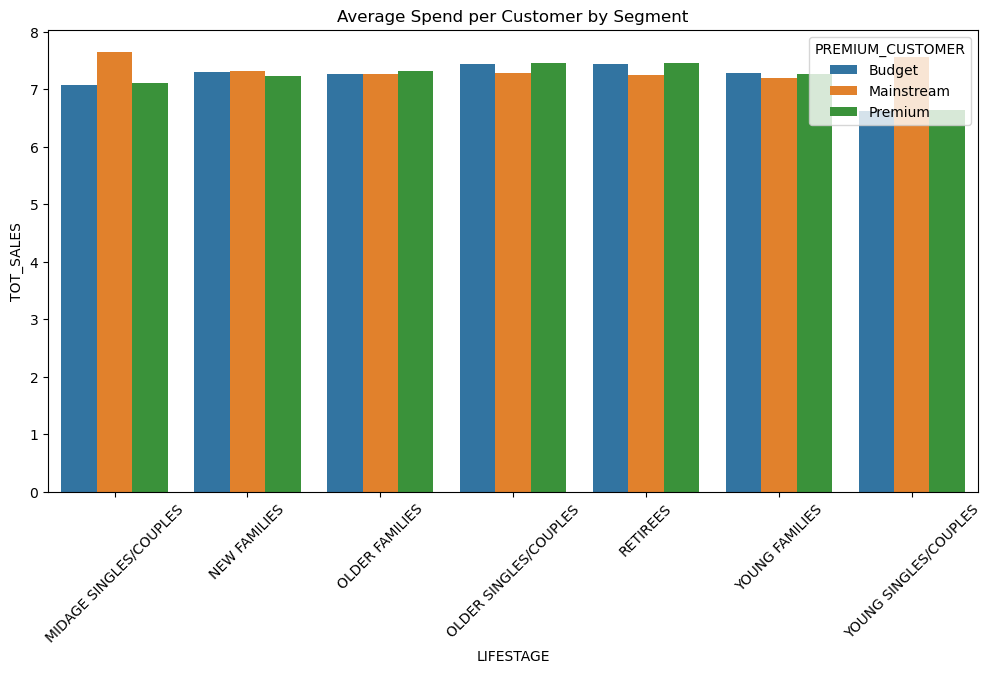

In [29]:
#Average Spend per Customer by Segment
plt.figure(figsize=(12,6))
sns.barplot(data=average_customer_spend,x='LIFESTAGE',y='TOT_SALES',hue='PREMIUM_CUSTOMER')
plt.title('Average Spend per Customer by Segment')
plt.xticks(rotation=45)
plt.show()

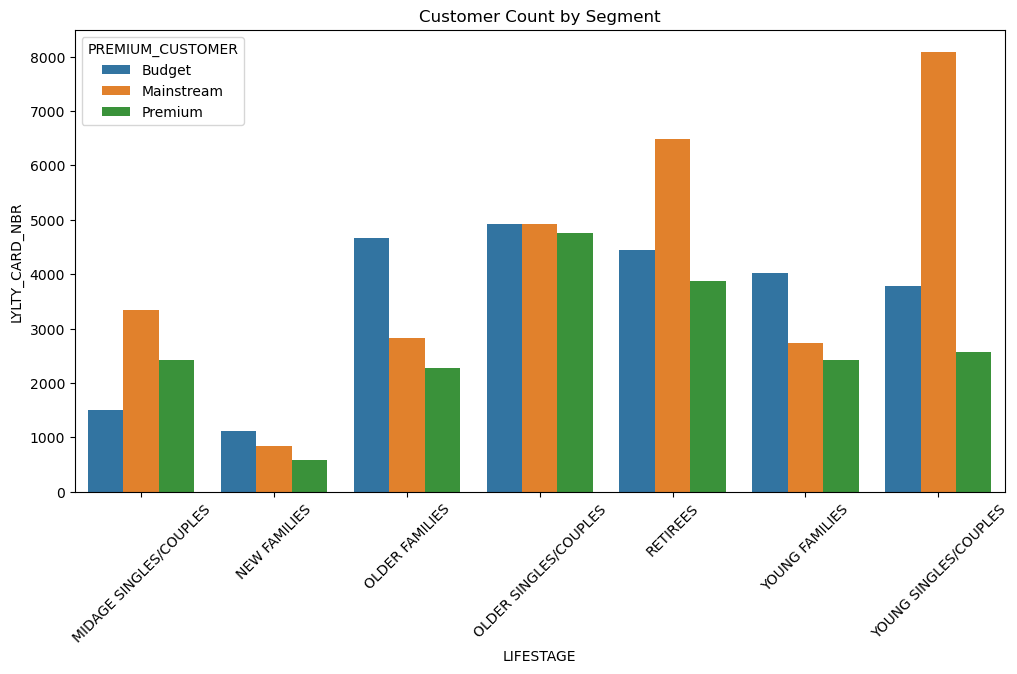

In [26]:
#Customer Count by Segment
plt.figure(figsize=(12, 6))
sns.barplot(data=customer_count, x='LIFESTAGE', y='LYLTY_CARD_NBR', hue='PREMIUM_CUSTOMER')
plt.title("Customer Count by Segment")
plt.xticks(rotation=45)
plt.show()


In [32]:
!jupyter nbconvert --to pdf your_notebook.ipynb


[NbConvertApp] WARNING | pattern 'your_notebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
 